#PCA DATA IRIS

In [52]:
#Melakukan impor library yang diperlukan
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
#Membaca file CSV dari URL yang diberikan
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Standarisasi Data
Tujuan standarisasi data adalah untuk menyeimbangkan skala variabel agar variabel-variabel dengan skala yang lebih besar tidak mendominasi analisis atau model yang menggunakan data tersebut.

In [54]:
#Mengambil Nilai-Nilai Fitur yang ada
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = dataset.loc[:, features].values

In [55]:
#Mengambil Nilai dalam Kolom "species" pada data iris
y = dataset.loc[:,['species']].values

In [56]:
#Melakukan Standarisasi data
x = StandardScaler().fit_transform(x)

In [57]:
#Terbentuknya dataframe baru (x)
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#Melakukan Proses PCA
PCA (Principal Component Analysis) adalah metode statistik yang digunakan untuk mengurangi dimensi data dengan memproyeksikan data dari ruang dimensi tinggi ke ruang dimensi yang lebih rendah.

In [58]:
#importing PCA library
from sklearn.decomposition import PCA

In [59]:
#Proses Tranformasi 
principalComponents = pca.fit_transform(x)

In [60]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [61]:
principalDf.head(5)

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [62]:
dataset[['species']].head(5)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [63]:
#menggabungkan DataFrame principalDf yang berisi komponen utama hasil transformasi PCA dengan kolom 'species' dari dataset asli (dataset)
akhirDf = pd.concat([principalDf, dataset[['species']]], axis = 1)
akhirDf.head(5)

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


#VISUALIASI PCA
Visualisasi PCA adalah proses menggambarkan hasil transformasi PCA dalam bentuk grafik atau plot untuk membantu pemahaman dan interpretasi terhadap variasi data yang dijelaskan oleh komponen utama.

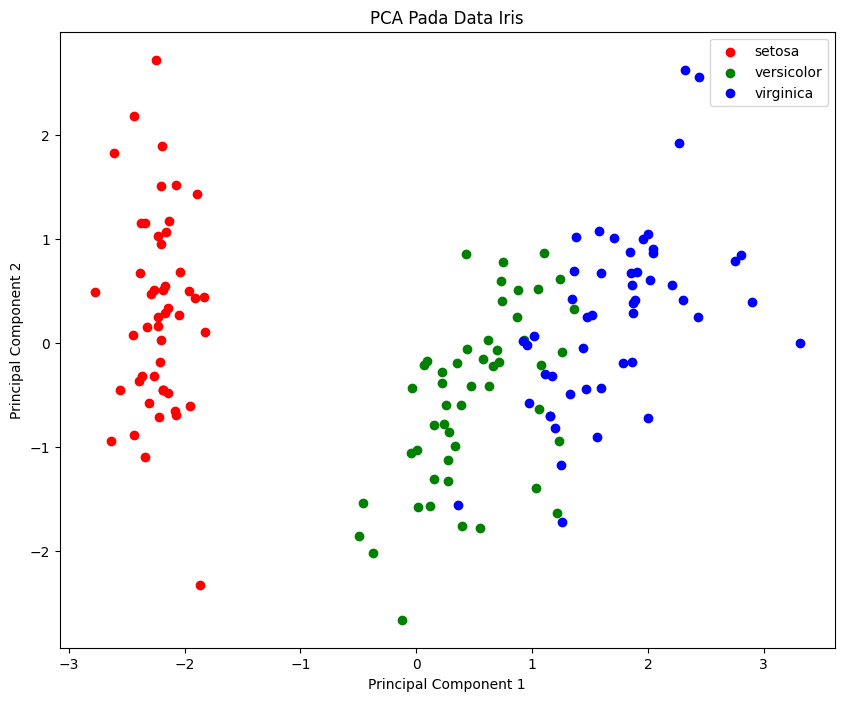

In [64]:
# Visualisasi PCA
plt.figure(figsize=(10, 8))
targets = dataset['species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = dataset['species'] == target
    plt.scatter(principalDf.loc[indices, 'PC1'], principalDf.loc[indices, 'PC2'], c=color, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Pada Data Iris')
plt.legend()
plt.show()

In [66]:
#persentase explained variance dari setiap komponen utama dalam urutan penjelasan.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])